<a href="https://colab.research.google.com/github/rammafitra/PyTorch_Model_DeepLearning_scratch/blob/main/CNN_Multi_Classification_Water_Turbidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!gdown "https://drive.google.com/uc?id=1lPN8kLKsLSDrbwx7nqUH2ScQ-IJqopMA&export=download"
!gdown "https://drive.google.com/uc?id=1kDIo1j7f3aumBrmgFgA29IdZoDwyoq9Y&export=download"



Downloading...
From: https://drive.google.com/uc?id=1lPN8kLKsLSDrbwx7nqUH2ScQ-IJqopMA&export=download
To: /content/test1_turbidity.zip
10.9MB [00:00, 50.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kDIo1j7f3aumBrmgFgA29IdZoDwyoq9Y&export=download
To: /content/train1_turbidity.zip
31.3MB [00:00, 99.4MB/s]


In [30]:
!unzip /content/test1_turbidity.zip

Archive:  /content/test1_turbidity.zip
   creating: test1_turbidity/
   creating: test1_turbidity/zero_turbidity/
  inflating: test1_turbidity/zero_turbidity/zero_turbidity500.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity501.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity502.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity503.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity504.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity505.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity506.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity507.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity508.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity509.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity510.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity511.jpg  
  inflating: test1_turbidity/zero_turbidity/zero_turbidity512.jpg  
  

In [31]:
!unzip /content/train1_turbidity.zip

Archive:  /content/train1_turbidity.zip
   creating: train1_turbidity/
   creating: train1_turbidity/zero_turbidity/
  inflating: train1_turbidity/zero_turbidity/zero_turbidity0.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity1.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity2.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity3.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity4.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity5.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity6.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity7.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity8.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity9.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity10.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity11.jpg  
  inflating: train1_turbidity/zero_turbidity/zero_turbidity12.jpg  
  inflati

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np
import random

# seed
random.seed(113)
torch.manual_seed(113)
torch.cuda.manual_seed(113)
np.random.seed(113)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

train_dir = "train1_turbidity/"
test_dir = "test1_turbidity/"

img_size = 150

train_transform = transforms.Compose([
    transforms.CenterCrop(img_size),
    transforms.RandomRotation(5), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


test_transform = transforms.Compose([
    transforms.CenterCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_img = datasets.ImageFolder(train_dir, transform=train_transform)
test_img = datasets.ImageFolder(test_dir, transform=test_transform)

cuda:0


In [54]:
print("train_img type   :",type(train_img))
print("train_img length :",len(train_img))
print("test_img length :",len(test_img))
print("train_img classes:",train_img.classes)
print("train_img[0] type:",type(train_img[0]))
print("train_img[0][0] t:",type(train_img[0][0]))
print("train_img[0][1] t:",type(train_img[0][1]))
print("train_img[0][0] s:",train_img[0][0].size())
print("train_img[0][1]  :",train_img[0][1])

n_labels = len(train_img.classes)

train_img type   : <class 'torchvision.datasets.folder.ImageFolder'>
train_img length : 622
test_img length : 223
train_img classes: ['average_turbidity', 'zero_turbidity']
train_img[0] type: <class 'tuple'>
train_img[0][0] t: <class 'torch.Tensor'>
train_img[0][1] t: <class 'int'>
train_img[0][0] s: torch.Size([3, 150, 150])
train_img[0][1]  : 0


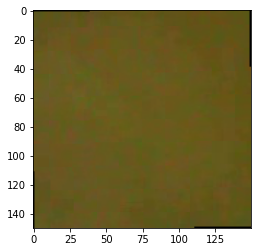

average_turbidity


In [55]:
def imshow(data_image, tensor=False):
    image = data_image[0]
    label = data_image[1]
    image = image.numpy().transpose((1, 2, 0))

    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5],)
    image = std * image + mean
    image = np.clip(image, 0, 1)

    plt.imshow(image)
    plt.show()
    
    print(train_img.classes[label])

imshow(train_img[0])

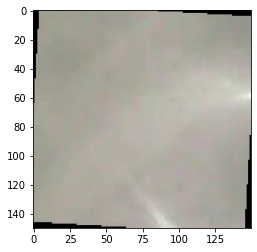

zero_turbidity


In [56]:
trainloaders = torch.utils.data.DataLoader(train_img, batch_size=16, shuffle=True)
testloaders = torch.utils.data.DataLoader(test_img, batch_size=8, shuffle=True)

for image, label in trainloaders:
    for i in range(1):
        imshow((image[i], label[i]))
    break

In [57]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.features = torch.nn.Sequential(
                            nn.Conv2d(3, 16, kernel_size=4, stride=1, padding=0),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),
                            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=3, stride=2, padding=0))
        self.classifier = torch.nn.Sequential(
                            nn.Linear(39200, 512),
                            nn.ReLU(),
                            nn.Dropout(),
                            nn.Linear(512, 2))
    
    def forward(self, x):
        x = self.features(x)
        x = x.reshape(x.shape[0], -1)
        x = self.classifier(x)
        return x
    
model = Net()
model.to(device)

Net(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=39200, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=2, bias=True)
  )
)

In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epoch = 10

In [67]:
model.train()

for i in range(epoch):
    total_loss = 0
    total_sample = 0    
    total_correct = 0
    
    for image, label in trainloaders:
        image = image.to(device)
        label = label.to(device)
        
        out = model(image)
        
        loss = criterion(out, label)
        total_loss += loss.item()
        total_sample += len(label)
        total_correct += torch.sum(torch.max(out,1)[1]==label).item()*1.0
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("epoch", i, total_loss/total_sample, total_correct/total_sample)

epoch 0 0.0 1.0
epoch 1 0.0 1.0
epoch 2 0.0 1.0
epoch 3 0.0 1.0
epoch 4 0.0 1.0
epoch 5 0.0 1.0
epoch 6 0.0 1.0
epoch 7 0.0 1.0
epoch 8 0.0 1.0
epoch 9 0.0 1.0


In [69]:
model.eval()
total_loss = 0
total_sample = 0    
total_correct = 0

for image, label in testloaders:
    image = image.to(device)
    label = label.to(device)
    
    out = model(image)

    loss = criterion(out, label)
    total_loss += loss.item()
    total_sample += len(label)
    total_correct += torch.sum(torch.max(out, 1)[1] == label).item()*1.0


print("test loss", total_loss/total_sample)
print("test accuracy", total_correct/total_sample)

test loss 0.0
test accuracy 1.0


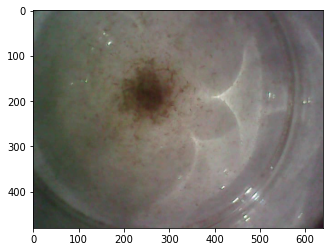

In [70]:
imagepath = '/content/test_turbidity/low_turbidity/low_turbidity501.jpg'
image_test = Image.open(imagepath)
plt.imshow(image_test)
plt.show()


In [71]:
image_transformed = test_transform(image_test) 
image_transformed = image_transformed.unsqueeze(0).to(device)
out = model(image_transformed)
print(out)
print("PREDICTION:", train_img.classes[torch.max(out,1)[1]])


tensor([[ 26.6697, -24.9421]], device='cuda:0', grad_fn=<AddmmBackward>)
PREDICTION: average_turbidity
